In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 22, 7

In [58]:
import pandas as pd 
import numpy as np 
from datetime import *
from collections import Counter
import re 
import seaborn as sns

In [3]:
f = open("WhatsApp Chat with DS Puneet.txt", 'r', encoding='utf-8')
data = f.read()
print(type(data))
print(data)

<class 'str'>
7/24/20, 3:51 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
7/24/20, 3:51 PM - Hasnain Mehmood: Hi, this is Hasnain from Pakistan. I just started with ML last month. Hope you won't mind if I stay in contact with u, in case i need any help
7/24/20, 7:37 PM - DS Puneet: Hi Hasnain
7/24/20, 7:37 PM - DS Puneet: Puneet here
7/24/20, 7:37 PM - DS Puneet: Yes, we can stay in touch.
7/24/20, 8:03 PM - Hasnain Mehmood: Thanks bud, it's been a couple of months since I started with DS so will keep bothering on and off. 😀
7/24/20, 8:13 PM - DS Puneet: Haha
7/24/20, 8:13 PM - DS Puneet: I like being bothered in this area.
7/24/20, 8:17 PM - Hasnain Mehmood: Cool
7/24/20, 8:17 PM - Hasnain Mehmood: 🤜🏻🤛🏻
7/25/20, 6:39 PM - Hasnain Mehmood: <Media omitted>
7/25/20, 6:40 PM - Hasnain Mehmood: Would it divide the data in the same fashion? I mean what's the difference between these two method

In [4]:
pattern = "\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\w[a-zA-Z]\s-\s"

In [5]:
messages = re.split(pattern, data)[1:]
print(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', "Hasnain Mehmood: Hi, this is Hasnain from Pakistan. I just started with ML last month. Hope you won't mind if I stay in contact with u, in case i need any help\n", 'DS Puneet: Hi Hasnain\n', 'DS Puneet: Puneet here\n', 'DS Puneet: Yes, we can stay in touch.\n', "Hasnain Mehmood: Thanks bud, it's been a couple of months since I started with DS so will keep bothering on and off. 😀\n", 'DS Puneet: Haha\n', 'DS Puneet: I like being bothered in this area.\n', 'Hasnain Mehmood: Cool\n', 'Hasnain Mehmood: 🤜🏻🤛🏻\n', 'Hasnain Mehmood: <Media omitted>\n', "Hasnain Mehmood: Would it divide the data in the same fashion? I mean what's the difference between these two methods?\n", 'DS Puneet: I am very busy\n', 'DS Puneet: Will let you know later\n', 'Hasnain Mehmood: Suree, take ur time\n', 'DS Puneet: They both produce the same results.\n', 'DS Puneet: C

In [6]:
dates = re.findall(pattern, data)
dates

['7/24/20, 3:51 PM - ',
 '7/24/20, 3:51 PM - ',
 '7/24/20, 7:37 PM - ',
 '7/24/20, 7:37 PM - ',
 '7/24/20, 7:37 PM - ',
 '7/24/20, 8:03 PM - ',
 '7/24/20, 8:13 PM - ',
 '7/24/20, 8:13 PM - ',
 '7/24/20, 8:17 PM - ',
 '7/24/20, 8:17 PM - ',
 '7/25/20, 6:39 PM - ',
 '7/25/20, 6:40 PM - ',
 '7/25/20, 7:37 PM - ',
 '7/25/20, 7:37 PM - ',
 '7/25/20, 7:40 PM - ',
 '7/25/20, 10:36 PM - ',
 '7/25/20, 10:37 PM - ',
 '7/25/20, 10:37 PM - ',
 '7/25/20, 10:38 PM - ',
 '7/25/20, 10:38 PM - ',
 '7/25/20, 11:11 PM - ',
 '7/25/20, 11:11 PM - ',
 '7/26/20, 7:29 AM - ',
 '7/26/20, 8:28 AM - ',
 '8/22/20, 3:14 PM - ',
 '8/22/20, 4:39 PM - ',
 '8/22/20, 5:43 PM - ',
 '10/7/20, 12:45 PM - ',
 '10/7/20, 6:55 PM - ',
 '10/7/20, 6:55 PM - ',
 '10/7/20, 6:56 PM - ',
 '10/7/20, 9:04 PM - ',
 '10/7/20, 9:04 PM - ',
 '10/7/20, 11:11 PM - ',
 '10/7/20, 11:17 PM - ',
 '10/7/20, 11:19 PM - ',
 '10/8/20, 1:29 PM - ',
 '10/8/20, 1:29 PM - ',
 '10/8/20, 1:29 PM - ',
 '10/8/20, 1:30 PM - ',
 '10/8/20, 8:51 PM - ',
 '10/

In [7]:
df = pd.DataFrame({'user_message':messages, 'date_time': dates})
df['date_time'] = df.date_time.apply(lambda x: x[:-3])
df['date'] = (df.date_time.str.split(",").str[0])
df['time'] = (df.date_time.str.split(",").str[1]).apply(lambda x: x.strip())
df['time_24'] = df.time.apply(lambda x: datetime.strptime(x, '%I:%M %p'))
df['time_24'] = pd.to_datetime(df['time_24']).dt.time
#df['date'] = pd.to_datetime(df.date, format="%d%m%Y, %I:%M %p")
df

user_message          date_time  \
0    Messages and calls are end-to-end encrypted. N...   7/24/20, 3:51 PM   
1    Hasnain Mehmood: Hi, this is Hasnain from Paki...   7/24/20, 3:51 PM   
2                              DS Puneet: Hi Hasnain\n   7/24/20, 7:37 PM   
3                             DS Puneet: Puneet here\n   7/24/20, 7:37 PM   
4              DS Puneet: Yes, we can stay in touch.\n   7/24/20, 7:37 PM   
..                                                 ...                ...   
533                          DS Puneet: Krte hai bro\n  10/18/21, 6:51 PM   
534                              Hasnain Mehmood: Ok\n  10/18/21, 6:56 PM   
535     Hasnain Mehmood: Beautiful, stay blessed! 💐😊\n   11/6/21, 1:10 PM   
536                          DS Puneet: Thanks man 😀\n   11/6/21, 1:28 PM   
537                         Hasnain Mehmood: Welcome\n   11/6/21, 2:40 PM   

         date     time   time_24  
0     7/24/20  3:51 PM  15:51:00  
1     7/24/20  3:51 PM  15:51:00  
2     7/24/20  7:37 PM  19:37:00  
3     7/24/20  7:37 PM  19:37:00  
4     7/24/20  7:37 PM  19:37:00  
..        ...      ...       ...  
533  10/18/21  6:51 PM  18:51:00  
534  10/18/21  6:56 PM  18:56:00  
535   11/6/21  1:10 PM  13:10:00  
536   11/6/21  1:28 PM  13:28:00  
537   11/6/21  2:40 PM  14:40:00  

[538 rows x 5 columns]

In [8]:
#Seperate Users and Messages
users = []
messages = []
for message in df.user_message:
    entry = re.split('([\w\W)]+?):\s', message)
    if entry[1:]: #user_name
        users.append(entry[1])
        messages.append(entry[2])
    else :
        users.append('Group Notification')
        messages.append(entry[0])
df['user'] = users
df['messages'] = messages
df

user_message          date_time  \
0    Messages and calls are end-to-end encrypted. N...   7/24/20, 3:51 PM   
1    Hasnain Mehmood: Hi, this is Hasnain from Paki...   7/24/20, 3:51 PM   
2                              DS Puneet: Hi Hasnain\n   7/24/20, 7:37 PM   
3                             DS Puneet: Puneet here\n   7/24/20, 7:37 PM   
4              DS Puneet: Yes, we can stay in touch.\n   7/24/20, 7:37 PM   
..                                                 ...                ...   
533                          DS Puneet: Krte hai bro\n  10/18/21, 6:51 PM   
534                              Hasnain Mehmood: Ok\n  10/18/21, 6:56 PM   
535     Hasnain Mehmood: Beautiful, stay blessed! 💐😊\n   11/6/21, 1:10 PM   
536                          DS Puneet: Thanks man 😀\n   11/6/21, 1:28 PM   
537                         Hasnain Mehmood: Welcome\n   11/6/21, 2:40 PM   

         date     time   time_24                user  \
0     7/24/20  3:51 PM  15:51:00  Group Notification   
1     7/24/20  3:51 PM  15:51:00     Hasnain Mehmood   
2     7/24/20  7:37 PM  19:37:00           DS Puneet   
3     7/24/20  7:37 PM  19:37:00           DS Puneet   
4     7/24/20  7:37 PM  19:37:00           DS Puneet   
..        ...      ...       ...                 ...   
533  10/18/21  6:51 PM  18:51:00           DS Puneet   
534  10/18/21  6:56 PM  18:56:00     Hasnain Mehmood   
535   11/6/21  1:10 PM  13:10:00     Hasnain Mehmood   
536   11/6/21  1:28 PM  13:28:00           DS Puneet   
537   11/6/21  2:40 PM  14:40:00     Hasnain Mehmood   

                                              messages  
0    Messages and calls are end-to-end encrypted. N...  
1    Hi, this is Hasnain from Pakistan. I just star...  
2                                         Hi Hasnain\n  
3                                        Puneet here\n  
4                         Yes, we can stay in touch.\n  
..                                                 ...  
533                                     Krte hai bro\n  
534                                               Ok\n  
535                      Beautiful, stay blessed! 💐😊\n  
536                                     Thanks man 😀\n  
537                                          Welcome\n  

[538 rows x 7 columns]

In [9]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month_name()
df['day'] = pd.to_datetime(df.date).dt.day
df['hour'] = pd.to_datetime(df.time).dt.hour
df['minute'] = pd.to_datetime(df.time).dt.minute
df

user_message          date_time  \
0    Messages and calls are end-to-end encrypted. N...   7/24/20, 3:51 PM   
1    Hasnain Mehmood: Hi, this is Hasnain from Paki...   7/24/20, 3:51 PM   
2                              DS Puneet: Hi Hasnain\n   7/24/20, 7:37 PM   
3                             DS Puneet: Puneet here\n   7/24/20, 7:37 PM   
4              DS Puneet: Yes, we can stay in touch.\n   7/24/20, 7:37 PM   
..                                                 ...                ...   
533                          DS Puneet: Krte hai bro\n  10/18/21, 6:51 PM   
534                              Hasnain Mehmood: Ok\n  10/18/21, 6:56 PM   
535     Hasnain Mehmood: Beautiful, stay blessed! 💐😊\n   11/6/21, 1:10 PM   
536                          DS Puneet: Thanks man 😀\n   11/6/21, 1:28 PM   
537                         Hasnain Mehmood: Welcome\n   11/6/21, 2:40 PM   

         date     time   time_24                user  \
0     7/24/20  3:51 PM  15:51:00  Group Notification   
1     7/24/20  3:51 PM  15:51:00     Hasnain Mehmood   
2     7/24/20  7:37 PM  19:37:00           DS Puneet   
3     7/24/20  7:37 PM  19:37:00           DS Puneet   
4     7/24/20  7:37 PM  19:37:00           DS Puneet   
..        ...      ...       ...                 ...   
533  10/18/21  6:51 PM  18:51:00           DS Puneet   
534  10/18/21  6:56 PM  18:56:00     Hasnain Mehmood   
535   11/6/21  1:10 PM  13:10:00     Hasnain Mehmood   
536   11/6/21  1:28 PM  13:28:00           DS Puneet   
537   11/6/21  2:40 PM  14:40:00     Hasnain Mehmood   

                                              messages  year     month  day  \
0    Messages and calls are end-to-end encrypted. N...  2020      July   24   
1    Hi, this is Hasnain from Pakistan. I just star...  2020      July   24   
2                                         Hi Hasnain\n  2020      July   24   
3                                        Puneet here\n  2020      July   24   
4                         Yes, we can stay in touch.\n  2020      July   24   
..                                                 ...   ...       ...  ...   
533                                     Krte hai bro\n  2021   October   18   
534                                               Ok\n  2021   October   18   
535                      Beautiful, stay blessed! 💐😊\n  2021  November    6   
536                                     Thanks man 😀\n  2021  November    6   
537                                          Welcome\n  2021  November    6   

     hour  minute  
0      15      51  
1      15      51  
2      19      37  
3      19      37  
4      19      37  
..    ...     ...  
533    18      51  
534    18      56  
535    13      10  
536    13      28  
537    14      40  

[538 rows x 12 columns]

## Code For deployement

In [10]:
df[df['user']=='Hasnain Mehmood'].shape[0] # Total number of msgs from user=Hasnain

235

In [11]:
df[df['user']=='DS Puneet'].shape[0]

302

In [12]:
words = [word for sent in df['messages'] for word in sent.split()]

In [13]:
len(words)

2412

#### Getting the urls from messages

In [14]:
from urlextract import URLExtract

extractor = URLExtract()
links = [link for message in df.messages for link in extractor.find_urls(message)]
links

['https://www.youtube.com/redirect?q=https%3A%2F%2Fwww.pantechsolutions.net%2Fai-master-class-python%2Fglobal.html&event=video_description&redir_token=QUFFLUhqa284UEZQYkY4NG9MdnpHMk5wM1JMNmtSVFIxUXxBQ3Jtc0ttdzZQSFFyZGNveC1CZlFyUDFwZzdJSTg1djhaMTE2Q0hNbGI3S2x2Y3pwTjNweFhaVDQ2UFVlY1MtNzRCemh1TDZjWjFHdmlJOUVudnhCeWY3SUpvVHh4aHhzdmVkNlNTNzVNNGNZdVZRenpDMFRCTQ%3D%3D&v=cYFzWxn5SFQ',
 'https://www.udemy.com/share/101WmQAkoceVlWQ3Q=/',
 'https://youtu.be/HTJwuFf08cE',
 'https://youtu.be/r4dhL1Ejm2Q',
 'https://youtu.be/qnTc5WeBamo',
 'https://youtu.be/w0kOxvV26cw',
 'https://www.linkedin.com/in/puneet-rajput-3534a3154',
 'https://www.scaler.com/event/learn-how-credit-card-companies-use-machine-learning-for-fraud-prevention?utm_source=ads&utm_medium=facebook&utm_campaign=perf_scaler-dsml_livemasterclass_ads_facebook_interest-dsandml-webinar-weekend_india_24-44&utm_content=programming-interest-carousel&utm_term=Instagram_Feed&creativeid=livemasterclass-20210918-e231-c1_carousel_lightblue_fraud-p

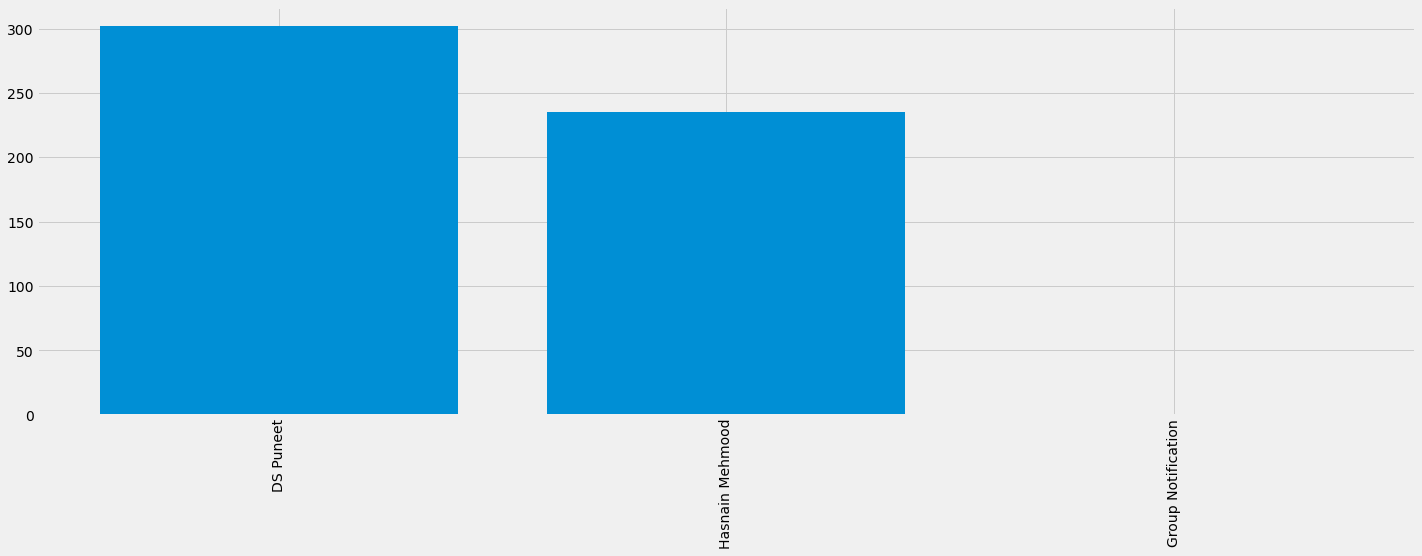

In [15]:
x = df.user.value_counts().head()
plt.bar(x.index, x.values)
plt.xticks(rotation='vertical');

In [16]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'})

name  percent
0           DS Puneet    56.13
1     Hasnain Mehmood    43.68
2  Group Notification     0.19

In [17]:
## Most frequent words in a GROUP
[word for message in df.messages for word in message.split()]

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Hi,',
 'this',
 'is',
 'Hasnain',
 'from',
 'Pakistan.',
 'I',
 'just',
 'started',
 'with',
 'ML',
 'last',
 'month.',
 'Hope',
 'you',
 "won't",
 'mind',
 'if',
 'I',
 'stay',
 'in',
 'contact',
 'with',
 'u,',
 'in',
 'case',
 'i',
 'need',
 'any',
 'help',
 'Hi',
 'Hasnain',
 'Puneet',
 'here',
 'Yes,',
 'we',
 'can',
 'stay',
 'in',
 'touch.',
 'Thanks',
 'bud,',
 "it's",
 'been',
 'a',
 'couple',
 'of',
 'months',
 'since',
 'I',
 'started',
 'with',
 'DS',
 'so',
 'will',
 'keep',
 'bothering',
 'on',
 'and',
 'off.',
 '😀',
 'Haha',
 'I',
 'like',
 'being',
 'bothered',
 'in',
 'this',
 'area.',
 'Cool',
 '🤜🏻🤛🏻',
 '<Media',
 'omitted>',
 'Would',
 'it',
 'divide',
 'the',
 'data',
 'in',
 'the',
 'same',
 'fashion?',
 'I',
 'mean',
 "what's"

In [18]:
pd.DataFrame(Counter(words).most_common(30))

0    1
0     <Media  105
1   omitted>  105
2          I   52
3         to   36
4        you   30
5        and   24
6          a   23
7        the   22
8          ?   21
9     Thanks   20
10       hai   20
11        is   19
12        in   18
13        it   18
14        of   16
15        me   16
16       for   15
17       bro   15
18        so   13
19       are   11
20      this   10
21       not   10
22      with    9
23      very    9
24       was    9
25      have    9
26         i    8
27      busy    8
28      time    8
29         ❣    8

In [19]:
temp = df[df['user'] !='Group Notification']
temp = temp[temp['messages'] != '<Media omitted>\n']
temp

user_message          date_time  \
1    Hasnain Mehmood: Hi, this is Hasnain from Paki...   7/24/20, 3:51 PM   
2                              DS Puneet: Hi Hasnain\n   7/24/20, 7:37 PM   
3                             DS Puneet: Puneet here\n   7/24/20, 7:37 PM   
4              DS Puneet: Yes, we can stay in touch.\n   7/24/20, 7:37 PM   
5    Hasnain Mehmood: Thanks bud, it's been a coupl...   7/24/20, 8:03 PM   
..                                                 ...                ...   
533                          DS Puneet: Krte hai bro\n  10/18/21, 6:51 PM   
534                              Hasnain Mehmood: Ok\n  10/18/21, 6:56 PM   
535     Hasnain Mehmood: Beautiful, stay blessed! 💐😊\n   11/6/21, 1:10 PM   
536                          DS Puneet: Thanks man 😀\n   11/6/21, 1:28 PM   
537                         Hasnain Mehmood: Welcome\n   11/6/21, 2:40 PM   

         date     time   time_24             user  \
1     7/24/20  3:51 PM  15:51:00  Hasnain Mehmood   
2     7/24/20  7:37 PM  19:37:00        DS Puneet   
3     7/24/20  7:37 PM  19:37:00        DS Puneet   
4     7/24/20  7:37 PM  19:37:00        DS Puneet   
5     7/24/20  8:03 PM  20:03:00  Hasnain Mehmood   
..        ...      ...       ...              ...   
533  10/18/21  6:51 PM  18:51:00        DS Puneet   
534  10/18/21  6:56 PM  18:56:00  Hasnain Mehmood   
535   11/6/21  1:10 PM  13:10:00  Hasnain Mehmood   
536   11/6/21  1:28 PM  13:28:00        DS Puneet   
537   11/6/21  2:40 PM  14:40:00  Hasnain Mehmood   

                                              messages  year     month  day  \
1    Hi, this is Hasnain from Pakistan. I just star...  2020      July   24   
2                                         Hi Hasnain\n  2020      July   24   
3                                        Puneet here\n  2020      July   24   
4                         Yes, we can stay in touch.\n  2020      July   24   
5    Thanks bud, it's been a couple of months since...  2020      July   24   
..                                                 ...   ...       ...  ...   
533                                     Krte hai bro\n  2021   October   18   
534                                               Ok\n  2021   October   18   
535                      Beautiful, stay blessed! 💐😊\n  2021  November    6   
536                                     Thanks man 😀\n  2021  November    6   
537                                          Welcome\n  2021  November    6   

     hour  minute  
1      15      51  
2      19      37  
3      19      37  
4      19      37  
5      20       3  
..    ...     ...  
533    18      51  
534    18      56  
535    13      10  
536    13      28  
537    14      40  

[432 rows x 12 columns]

In [20]:
with open('stopwords.txt', 'r') as f:
    stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [21]:
#TOP 20 words
words = [word for message in temp.messages for word in message.lower().split() if word not in stop_words]
most_common = pd.DataFrame(Counter(words).most_common(20))
most_common

0  1
0       busy  9
1       call  9
2          ❣  8
3      happy  8
4      yeah,  7
5          😂  7
6    vietnam  7
7       🤜🏻🤛🏻  6
8       bro,  6
9       stay  5
10         😀  5
11        👍🏻  5
12     india  5
13    diwali  5
14         😁  5
15      baat  5
16      krte  5
17  birthday  5
18      haha  4
19      data  4

In [22]:
wc_data = [word for message in temp['messages'] for word in message.lower().split() if word not in stop_words]
wc_data = ' '.join(wc_data)

In [23]:
wc_data = [word for message in temp['messages'] for word in message.lower().split() if word not in stop_words]

In [24]:
wc_data = ' '.join(wc_data)

In [25]:
wc_data 

"hi, hasnain pakistan. started ml month. mind stay contact u, case hasnain puneet yes, stay touch. bud, couple months started bothering off. 😀 haha bothered area. cool 🤜🏻🤛🏻 divide data fashion? difference methods? busy suree, produce results. corss validation deprecated code. train test split recent advanced function. provided random state recommend train_test_split concept grasp making clear. makes sense. 👍🏻 anytime😅 🤜🏻🤛🏻 [ ] == [null] == [nan] true? ok. wow catchy hai? ❣ junior bhejo woww 😂😂 written junior attractive bro. puneet! welcome! puneet, lemme call you. favor. okay. office work. know. available? busy chat call krle happened call busy yeah, talk tomorrow 👍🏻 hi, puneet kindly availability free missed voice call missed voice call sorry bro, disconnected earlier https://www.youtube.com/redirect?q=https%3a%2f%2fwww.pantechsolutions.net%2fai-master-class-python%2fglobal.html&event=video_description&redir_token=quffluhqa284uezqyky4ng9mdnphmk5wm1jmnmtsvfixuxxbq3jtc0ttdzzqsffyzgnvec1

In [26]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')
wc_df = wc.generate(wc_data)

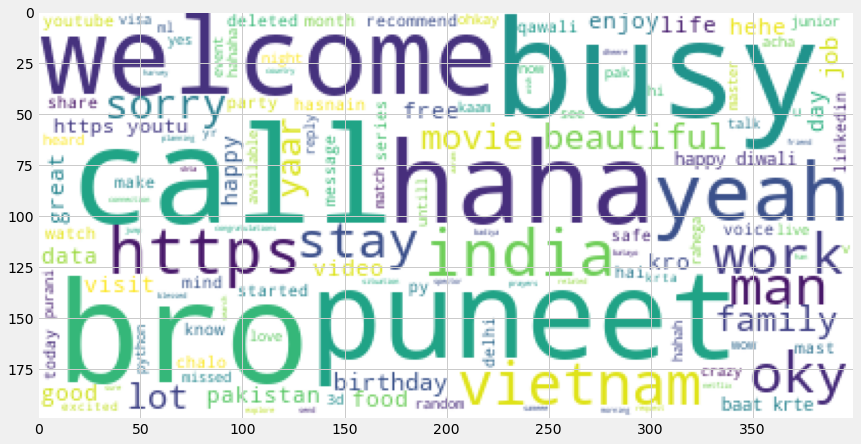

In [27]:
fig, ax = plt.subplots()
ax.imshow(wc_df);

In [28]:
!pip install emoji

  Using cached emoji-1.6.1.tar.gz (170 kB)
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169294 sha256=f7a460798671cf90ec5c1b52bb68cdacdc518089ab1f6bc00a9d4387440f149a
  Stored in directory: c:\users\92304\appdata\local\pip\cache\wheels\04\29\50\1e7189f03d2cf139e469863d54a1d3eabeb10c92c84e51f8a1
Successfully built emoji


In [29]:
import emoji
emojis = [c for message in df['messages'] for c in message if c in emoji.UNICODE_EMOJI['en']]
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

0   1
0   😂  30
1   🏻  24
2   😁  12
3   👍  10
4   ❣   9
5   😀   8
6   🤣   8
7   🤜   6
8   🤛   6
9   💯   6
10  👺   6
11  😅   5
12  😊   4
13  😃   4
14  ✨   4
15  🔥   3
16  😄   3
17  🎉   3
18  ✌   2
19  👏   2
20  🤦   2
21  ♂   2
22  😍   2
23  🥰   2
24  😶   2
25  🥳   1
26  🙂   1
27  😥   1
28  🎂   1
29  🍰   1
30  😏   1
31  🍕   1
32  ❤   1
33  💍   1
34  💐   1

In [30]:
df['month_num'] = pd.to_datetime(df['date']).dt.month
df

user_message          date_time  \
0    Messages and calls are end-to-end encrypted. N...   7/24/20, 3:51 PM   
1    Hasnain Mehmood: Hi, this is Hasnain from Paki...   7/24/20, 3:51 PM   
2                              DS Puneet: Hi Hasnain\n   7/24/20, 7:37 PM   
3                             DS Puneet: Puneet here\n   7/24/20, 7:37 PM   
4              DS Puneet: Yes, we can stay in touch.\n   7/24/20, 7:37 PM   
..                                                 ...                ...   
533                          DS Puneet: Krte hai bro\n  10/18/21, 6:51 PM   
534                              Hasnain Mehmood: Ok\n  10/18/21, 6:56 PM   
535     Hasnain Mehmood: Beautiful, stay blessed! 💐😊\n   11/6/21, 1:10 PM   
536                          DS Puneet: Thanks man 😀\n   11/6/21, 1:28 PM   
537                         Hasnain Mehmood: Welcome\n   11/6/21, 2:40 PM   

         date     time   time_24                user  \
0     7/24/20  3:51 PM  15:51:00  Group Notification   
1     7/24/20  3:51 PM  15:51:00     Hasnain Mehmood   
2     7/24/20  7:37 PM  19:37:00           DS Puneet   
3     7/24/20  7:37 PM  19:37:00           DS Puneet   
4     7/24/20  7:37 PM  19:37:00           DS Puneet   
..        ...      ...       ...                 ...   
533  10/18/21  6:51 PM  18:51:00           DS Puneet   
534  10/18/21  6:56 PM  18:56:00     Hasnain Mehmood   
535   11/6/21  1:10 PM  13:10:00     Hasnain Mehmood   
536   11/6/21  1:28 PM  13:28:00           DS Puneet   
537   11/6/21  2:40 PM  14:40:00     Hasnain Mehmood   

                                              messages  year     month  day  \
0    Messages and calls are end-to-end encrypted. N...  2020      July   24   
1    Hi, this is Hasnain from Pakistan. I just star...  2020      July   24   
2                                         Hi Hasnain\n  2020      July   24   
3                                        Puneet here\n  2020      July   24   
4                         Yes, we can stay in touch.\n  2020      July   24   
..                                                 ...   ...       ...  ...   
533                                     Krte hai bro\n  2021   October   18   
534                                               Ok\n  2021   October   18   
535                      Beautiful, stay blessed! 💐😊\n  2021  November    6   
536                                     Thanks man 😀\n  2021  November    6   
537                                          Welcome\n  2021  November    6   

     hour  minute  month_num  
0      15      51          7  
1      15      51          7  
2      19      37          7  
3      19      37          7  
4      19      37          7  
..    ...     ...        ...  
533    18      51         10  
534    18      56         10  
535    13      10         11  
536    13      28         11  
537    14      40         11  

[538 rows x 13 columns]

In [31]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['messages'].reset_index()
timeline

year  month_num      month  messages
0   2020          7       July        24
1   2020          8     August         3
2   2020         10    October        68
3   2020         11   November        54
4   2020         12   December       147
5   2021          1    January        86
6   2021          2   February        13
7   2021          4      April         8
8   2021          5        May         9
9   2021          6       June        51
10  2021          7       July         2
11  2021          9  September        41
12  2021         10    October        29
13  2021         11   November         3

In [32]:
for i in range(timeline.shape[0]):
    print(timeline['month'][i]+'-'+str(timeline['year'][i]))

July-2020
August-2020
October-2020
November-2020
December-2020
January-2021
February-2021
April-2021
May-2021
June-2021
July-2021
September-2021
October-2021
November-2021


In [33]:
[j for i in range(timeline.shape[0]) for j in (timeline['month'][i]+'-'+str(timeline['year'][i]))]

['J',
 'u',
 'l',
 'y',
 '-',
 '2',
 '0',
 '2',
 '0',
 'A',
 'u',
 'g',
 'u',
 's',
 't',
 '-',
 '2',
 '0',
 '2',
 '0',
 'O',
 'c',
 't',
 'o',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '0',
 'N',
 'o',
 'v',
 'e',
 'm',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '0',
 'D',
 'e',
 'c',
 'e',
 'm',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '0',
 'J',
 'a',
 'n',
 'u',
 'a',
 'r',
 'y',
 '-',
 '2',
 '0',
 '2',
 '1',
 'F',
 'e',
 'b',
 'r',
 'u',
 'a',
 'r',
 'y',
 '-',
 '2',
 '0',
 '2',
 '1',
 'A',
 'p',
 'r',
 'i',
 'l',
 '-',
 '2',
 '0',
 '2',
 '1',
 'M',
 'a',
 'y',
 '-',
 '2',
 '0',
 '2',
 '1',
 'J',
 'u',
 'n',
 'e',
 '-',
 '2',
 '0',
 '2',
 '1',
 'J',
 'u',
 'l',
 'y',
 '-',
 '2',
 '0',
 '2',
 '1',
 'S',
 'e',
 'p',
 't',
 'e',
 'm',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '1',
 'O',
 'c',
 't',
 'o',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '1',
 'N',
 'o',
 'v',
 'e',
 'm',
 'b',
 'e',
 'r',
 '-',
 '2',
 '0',
 '2',
 '1']

In [34]:
timeline['time'] = ['-'.join(i) for i in zip(timeline["month"],timeline["year"].map(str))]
timeline

year  month_num      month  messages            time
0   2020          7       July        24       July-2020
1   2020          8     August         3     August-2020
2   2020         10    October        68    October-2020
3   2020         11   November        54   November-2020
4   2020         12   December       147   December-2020
5   2021          1    January        86    January-2021
6   2021          2   February        13   February-2021
7   2021          4      April         8      April-2021
8   2021          5        May         9        May-2021
9   2021          6       June        51       June-2021
10  2021          7       July         2       July-2021
11  2021          9  September        41  September-2021
12  2021         10    October        29    October-2021
13  2021         11   November         3   November-2021

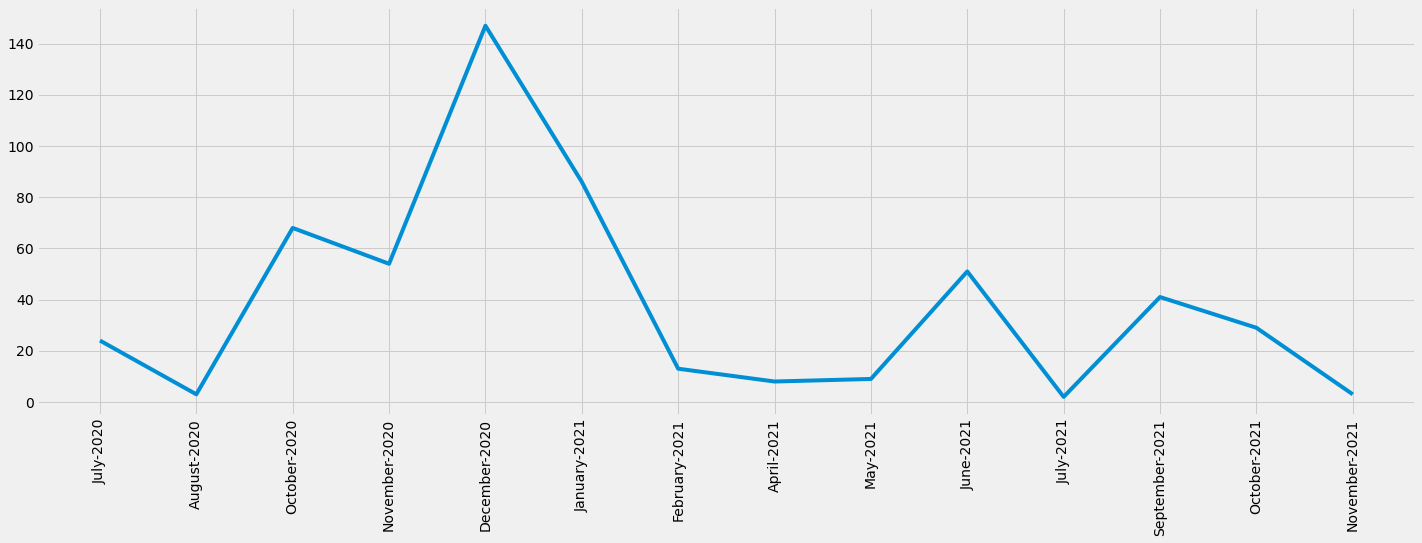

In [35]:
plt.plot(timeline['time'], timeline['messages'])
plt.xticks(rotation='vertical');

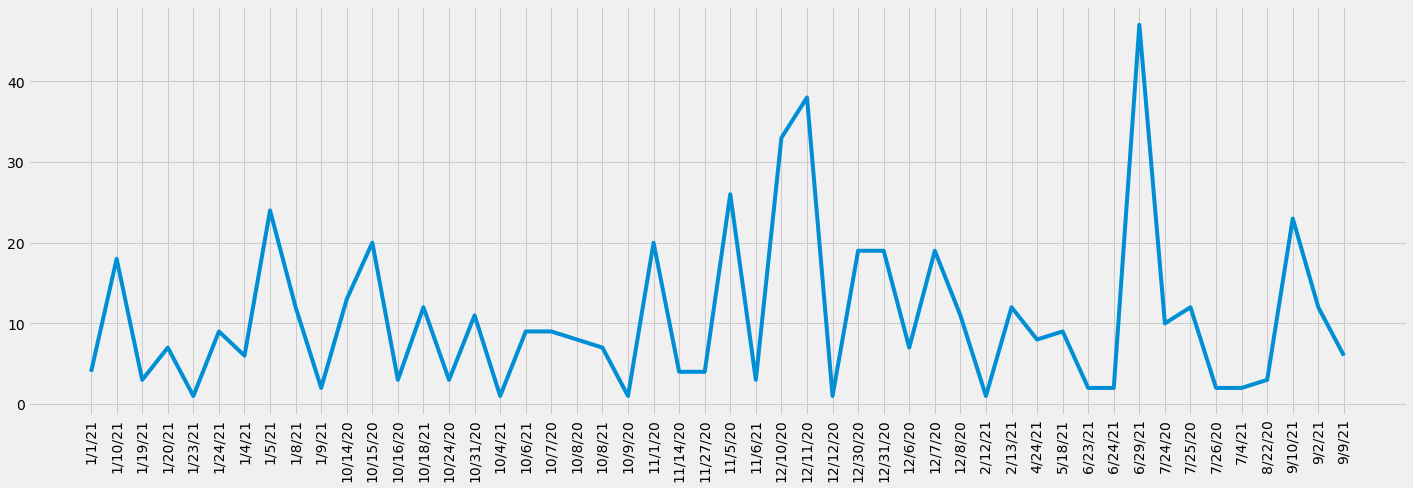

In [44]:
daily_timeline = df.groupby(by='date').count()['messages'].reset_index()
plt.plot(daily_timeline['date'], daily_timeline['messages'])
plt.xticks(rotation='vertical');

In [46]:
df['day_name'] = pd.to_datetime(df['date']).dt.day_name()
df

user_message          date_time  \
0    Messages and calls are end-to-end encrypted. N...   7/24/20, 3:51 PM   
1    Hasnain Mehmood: Hi, this is Hasnain from Paki...   7/24/20, 3:51 PM   
2                              DS Puneet: Hi Hasnain\n   7/24/20, 7:37 PM   
3                             DS Puneet: Puneet here\n   7/24/20, 7:37 PM   
4              DS Puneet: Yes, we can stay in touch.\n   7/24/20, 7:37 PM   
..                                                 ...                ...   
533                          DS Puneet: Krte hai bro\n  10/18/21, 6:51 PM   
534                              Hasnain Mehmood: Ok\n  10/18/21, 6:56 PM   
535     Hasnain Mehmood: Beautiful, stay blessed! 💐😊\n   11/6/21, 1:10 PM   
536                          DS Puneet: Thanks man 😀\n   11/6/21, 1:28 PM   
537                         Hasnain Mehmood: Welcome\n   11/6/21, 2:40 PM   

         date     time   time_24                user  \
0     7/24/20  3:51 PM  15:51:00  Group Notification   
1     7/24/20  3:51 PM  15:51:00     Hasnain Mehmood   
2     7/24/20  7:37 PM  19:37:00           DS Puneet   
3     7/24/20  7:37 PM  19:37:00           DS Puneet   
4     7/24/20  7:37 PM  19:37:00           DS Puneet   
..        ...      ...       ...                 ...   
533  10/18/21  6:51 PM  18:51:00           DS Puneet   
534  10/18/21  6:56 PM  18:56:00     Hasnain Mehmood   
535   11/6/21  1:10 PM  13:10:00     Hasnain Mehmood   
536   11/6/21  1:28 PM  13:28:00           DS Puneet   
537   11/6/21  2:40 PM  14:40:00     Hasnain Mehmood   

                                              messages  year     month  day  \
0    Messages and calls are end-to-end encrypted. N...  2020      July   24   
1    Hi, this is Hasnain from Pakistan. I just star...  2020      July   24   
2                                         Hi Hasnain\n  2020      July   24   
3                                        Puneet here\n  2020      July   24   
4                         Yes, we can stay in touch.\n  2020      July   24   
..                                                 ...   ...       ...  ...   
533                                     Krte hai bro\n  2021   October   18   
534                                               Ok\n  2021   October   18   
535                      Beautiful, stay blessed! 💐😊\n  2021  November    6   
536                                     Thanks man 😀\n  2021  November    6   
537                                          Welcome\n  2021  November    6   

     hour  minute  month_num  day_name  
0      15      51          7    Friday  
1      15      51          7    Friday  
2      19      37          7    Friday  
3      19      37          7    Friday  
4      19      37          7    Friday  
..    ...     ...        ...       ...  
533    18      51         10    Monday  
534    18      56         10    Monday  
535    13      10         11  Saturday  
536    13      28         11  Saturday  
537    14      40         11  Saturday  

[538 rows x 14 columns]

In [47]:
df.day_name.value_counts() 

Thursday     126
Friday       103
Tuesday       94
Saturday      60
Wednesday     59
Sunday        58
Monday        38
Name: day_name, dtype: int64

In [56]:
#Preparing Data for Heatmap
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))
df['period'] = period 

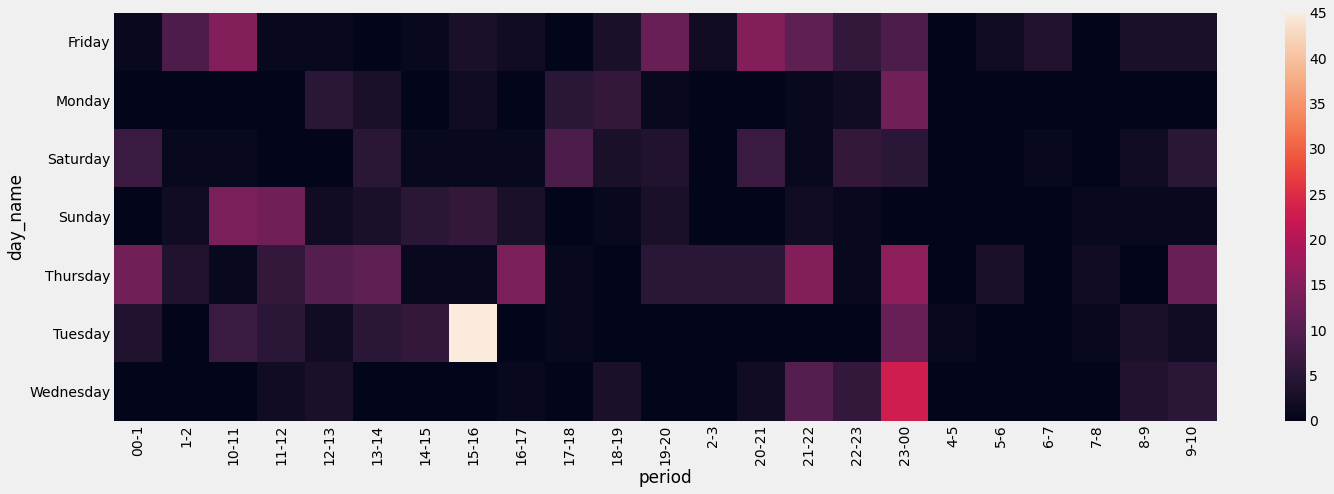

In [75]:
sns.heatmap(df.sort_values(by = 'hour', ascending=True).pivot_table(index='day_name', columns='period', values='messages', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical');